# Introduction to the FlowAccumulator

Landlab directs flow and accumulates it using two types of components:

**FlowDirectors** use the topography to determine how flow moves between adjacent nodes. For every node in the grid it determines the nodes to receive flow and the proportion of flow to send from one node to its receiver. 

The **FlowAccumulator** uses the direction and proportion of flow moving between each node and (optionally) water runoff to calculate drainage area and discharge.  

In this tutorial we will go over how to initialize and run the **FlowAccumulator**. For tutorials on how to initialize and run a **FlowDirector** and a brief comparison between the different flow direction algorithms or for more detailed examples that contrast the differences between each flow direction algorithm, refer to the other tutorials in this section. 

First, we import the necessary python modules and make a small plotting routine. 

In [1]:
import numpy as np
import pymt.models

➡ models: FrostNumber, Ku, ExponentialWeatherer, Flexure, FlowAccumulator, FlowDirectorD8, FlowDirectorDINF, FlowDirectorSteepest, FlowRouter, LinearDiffuser, OverlandFlow, SoilMoisture, StreamPowerEroder, TransportLengthHillslopeDiffuser, Vegetation, Hydrotrend, Child, Cem, Waves


## Initalizing and running the FlowAccumulator

To setup the **FlowAccumulator**, you must pass it information about the grid that it will be working on. 

**FlowAccumulator** will create and use a **FlowDirector** to calculate flow directions. The default **FlowDirector** is **FlowDirectorSteepest** which is the same as D4 in the special case of a raster grid. There are a few different ways to specify which **FlowDirector** you want **FlowAccumulator** to use. The next section will go over these options. 

**FlowAccumulator** can take a constant or spatially variable input called ```runoff_rate``` which it uses to calculate discharge. Alternatively, if no value is specified as ```runoff_rate```, **FlowAccumulator** will use the values stored in ```water__unit_flux_in```.

In addition to directing flow and accumulating it in one step, **FlowAccumulator** can also deal with depression finding internally. This can be done by passing a **DepressionFinder** to the keyword argument ```depression_finder```. The default behavior is to not deal with depressions internally.

In [2]:
flow_accumulator = pymt.models.FlowAccumulator()

In [3]:
grid = {
    "grid_rows": 10,
    "grid_columns": 10,
    "grid_row_spacing": 1.0,
    "grid_column_spacing": 1.0,
}

In [4]:
config_file, config_dir = flow_accumulator.setup(**grid)

In [5]:
flow_accumulator.initialize(config_file, config_dir)

## Topographic grids

For this tutorial we will consider one topographic surface. 

In [6]:
flow_accumulator.var["topographic__elevation"]

<DataValues>
float64 topographic__elevation(node)
Attributes:
    units: m
    grid: 0
    intent: in
    location: node

In [7]:
z = 3 * flow_accumulator.grid[0].node_x ** 2 + flow_accumulator.grid[0].node_y ** 2

In [8]:
flow_accumulator.set_value("topographic__elevation", z)

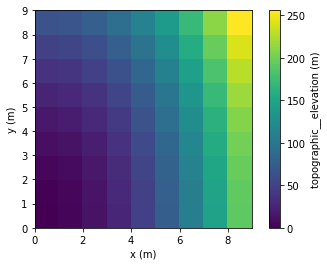

In [9]:
flow_accumulator.quick_plot("topographic__elevation")

Calculate the flow accumulator using the new elevations.

In [10]:
flow_accumulator.update()

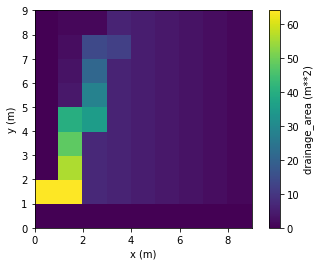

In [11]:
flow_accumulator.quick_plot("drainage_area")

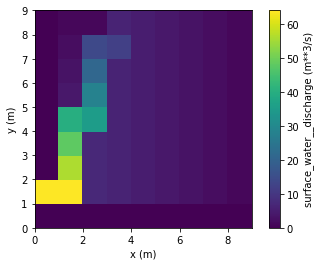

In [12]:
flow_accumulator.quick_plot("surface_water__discharge")

We can rain on the surface, store that rain in the field ```water__unit_flux_in```, and then re-run the **FlowAccumulator**. As an example, we will 'rain' a uniform random number between 0 and 1 on every node. 

In [13]:
rain = 1.0 + 5.0 * np.random.rand(flow_accumulator.grid[0].dims["node"])

In [14]:
flow_accumulator.set_value("water__unit_flux_in", rain)

Next, we re-run the **FlowAccumulator** and plot the discharge. 

In [15]:
flow_accumulator.update()

The basic pattern of drainage is the same but the values for the surface water discharge are different than for drainage area. 

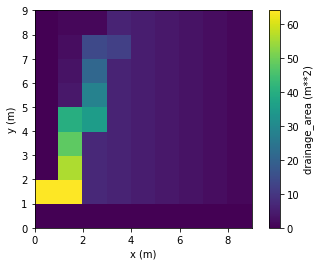

In [16]:
flow_accumulator.quick_plot("drainage_area")

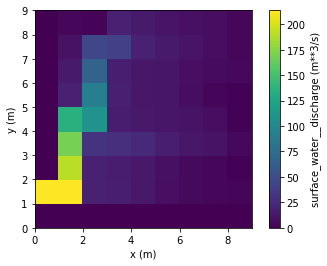

In [17]:
flow_accumulator.quick_plot("surface_water__discharge")

We will now rerun the example but using a *D8* method, rather than *D4*, to calculate the flow directions.

In [18]:
flow_accumulator = pymt.models.FlowAccumulator()
config_file, config_dir = flow_accumulator.setup(**grid, flow_director="D8")

In [19]:
flow_accumulator.initialize(config_file, config_dir)
flow_accumulator.set_value("topographic__elevation", z)

In [20]:
flow_accumulator.update()

As expected, we see that using the *D8* method gives different results for the flow directions, and so for *drainage_area*.

In [21]:
flow_accumulator.get_value("drainage_area").reshape((10, 10))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 34.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0.],
       [ 15.,  26.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0.],
       [ 15.,  15.,  18.,   6.,   5.,   4.,   3.,   2.,   1.,   0.],
       [  0.,  15.,  14.,  11.,   5.,   4.,   3.,   2.,   1.,   0.],
       [  0.,  10.,   4.,  13.,   5.,   4.,   3.,   2.,   1.,   0.],
       [  0.,   6.,   3.,   3.,  12.,   4.,   3.,   2.,   1.,   0.],
       [  0.,   3.,   2.,   2.,   2.,   7.,   3.,   2.,   1.,   0.],
       [  0.,   1.,   1.,   1.,   1.,   1.,   3.,   2.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

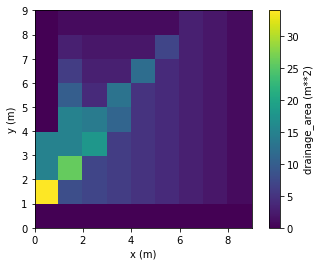

In [22]:
flow_accumulator.quick_plot("drainage_area")